# ***PROBLEM STATEMENT***
---

Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

---
## ***Exploratory Data Analysis (EDA)***
---

#### Importing libraries for EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading Training and Testing Datasets from Separate Files

In [2]:
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

train = pd.read_csv(train_url, header=None, skipinitialspace=True)
test = pd.read_csv(test_url, header=0, skipinitialspace=True, skiprows=1)

#### Assigning the column names according to "adult.names" file with dataset

In [3]:
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

train.columns = columns
test.columns = columns

Displaying Training & Test sets

In [4]:
print("Training Set")
display(train.head())

Training Set


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
print("Test Set")
display(test.head())

Test Set


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


#### Replacing random symbol with an atleast relevant value, while also getting its shape

In [6]:
train.replace('?', 'Unknown', inplace=True)
print(f"Shape of Training set: {train.shape}")
test.replace('?', 'Unknown', inplace=True)
print(f"Shape of Test set: {test.shape}")

Shape of Training set: (32561, 15)
Shape of Test set: (16280, 15)


Checking the value counts of income (<=50K or >50K)

In [7]:
test['income'].value_counts()

,count
income,
<=50K.,12434
>50K.,3846


 - The value counts of income tells us that the data is ***more oriented*** (skewed) towards income <= 50K.<br>
 - The data splits in approxiamtely 76% + 24%

Describing the dataset

In [8]:
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Plotting a ***Histogram*** between "Age" & "Occupation"

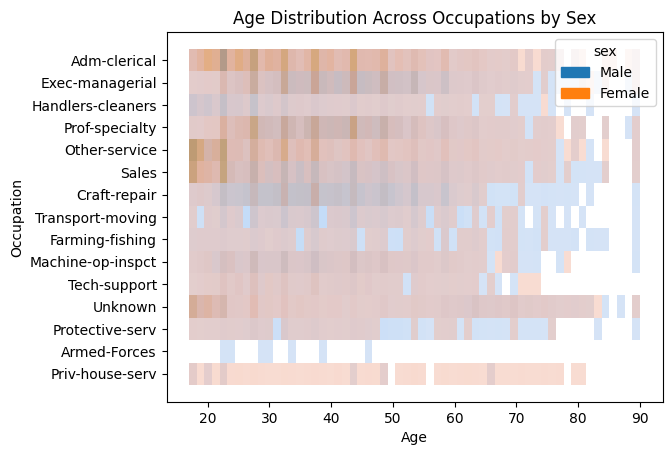

In [9]:
sns.histplot(x='age', y='occupation', data=train, hue='sex', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Occupation')
plt.title('Age Distribution Across Occupations by Sex')
plt.show()

---
Insights on histplot above:

- There are almost all Males in Armed Forces & all Females Private House Services.
- The dense portion between 20-45 ages suggests the major working ages across all classes in society.
- Usually Males tends to work for longer period of time (age) than Females
- The disproportionate presence of females in service, care, and management roles suggests that the "Unknown" occupation category may primarily reflect service-related professions.
---

### Creating a ***Histogram*** to Show the Distribution of Education Levels Across Races

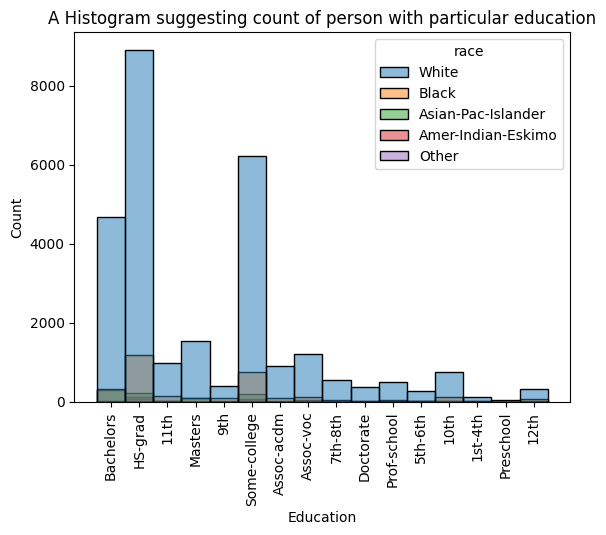

In [10]:
sns.histplot(x='education', data=train, hue='race')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('A Histogram suggesting count of person with particular education')
plt.show()

## Plotting a Polar Bar chart to show quantitative comparision between Education Levels with High Income

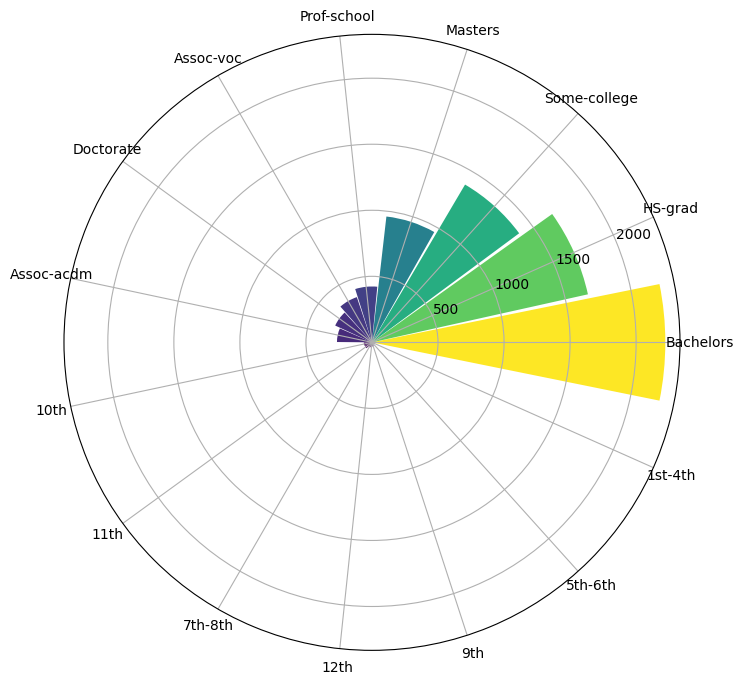

In [11]:
train_income = train[train['income'] == '>50K']
counts = train_income['education'].value_counts()

labels = counts.index
values = counts.values
angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'polar':True})
bars = ax.bar(angles, values, width=0.4, color=plt.cm.viridis((values / max(values))))

ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=10)
plt.show()

Its just a fancy way to show the same histogram above but without hue.

---
Insights on histplot ablove:

- The dataset in too much inclined towards "White" race.
- The go-to Education levels are Bachelors & High School Graduates.
- Most of the society is well educated than a 12th grader.
---

### Plotting a ***Kernel Density Estimation*** (KDE) between "Age" & "Hours worked per week"

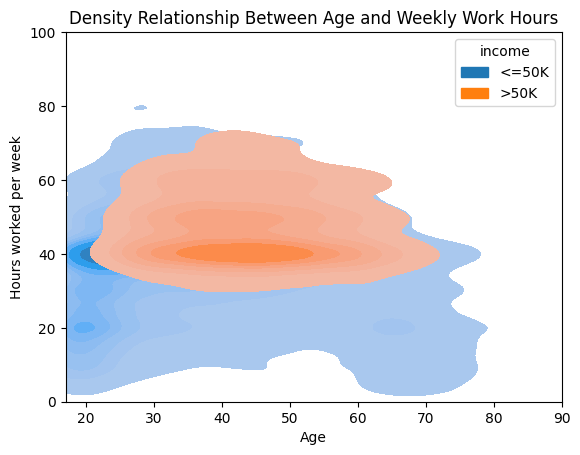

In [12]:
sns.kdeplot(x='age', y='hours-per-week', data=train, fill=True, thresh=0.05, hue='income')
plt.xlabel('Age')
plt.ylabel('Hours worked per week')
plt.title('Density Relationship Between Age and Weekly Work Hours')
plt.xlim(train['age'].min(), 90)
plt.ylim(0, 100)
plt.show()

---
Insights on KDE plot above:

- Consistent with the earlier histogram of 'age' vs. 'occupation', this KDE plot confirms that the majority of the working population falls within the 20–45 age group.
- Group of people who earn more than 50K, work in majority between 40-50 hours per week
-To be noted that people between age groups 0-10 (children) & 50-60 (retired) work for almost 5-10 hours per week
---

---
## ***Machine Learning Workflow***
---

### Importing all required libraries to preprocess data & perform metrics

In [13]:
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

### ***Encoding*** the "categorical" columns and have seperately encoded / assigned values to avoid fuss

In [14]:
data = pd.concat([train, test], ignore_index=True)                                        ## Instead of encoding individually I have concataneted to avoid repeating the process twice!!
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})

for col in columns:
    if col != 'income':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

for col in columns:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

train = data.iloc[:len(train)]
test = data.iloc[len(train):]

### ***Correlation Matrix***

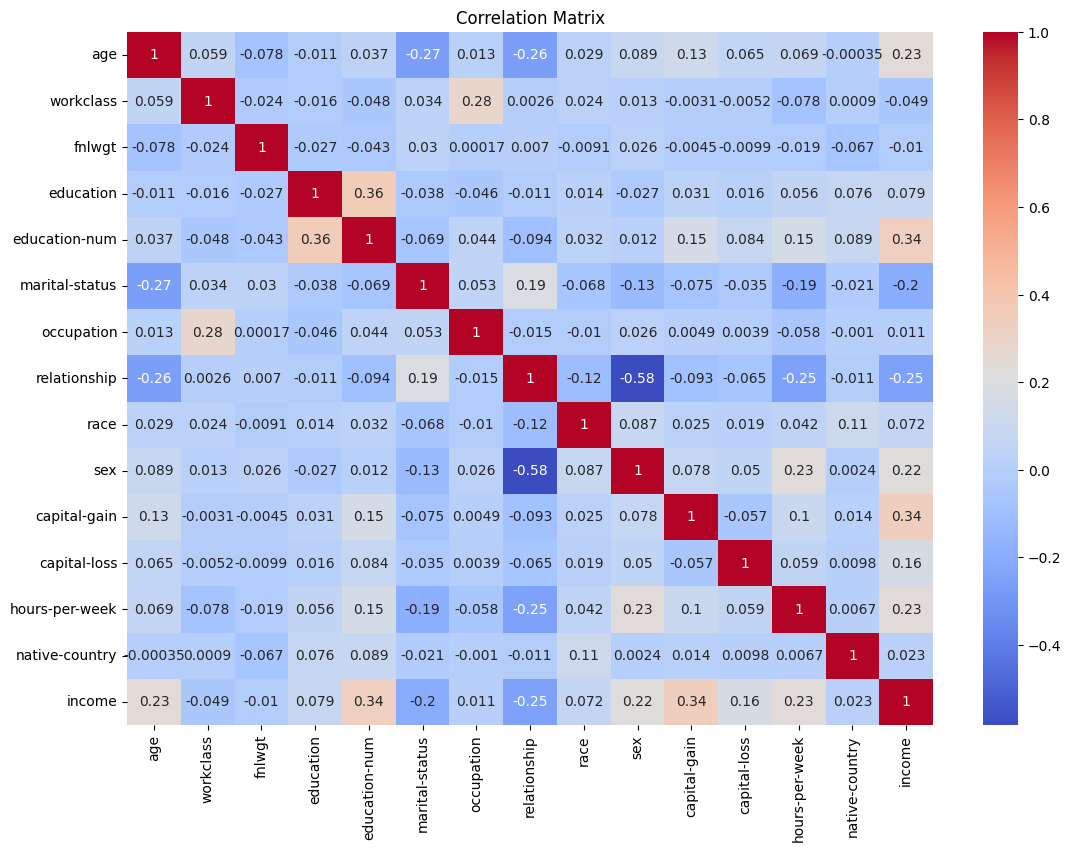

In [15]:
plt.figure(figsize=(13,9))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Insights on correlation matrix above:

- The numerical features in dataset are in almost no relation as correlation is **near 0** or **negative**.
- This suggets that the features are independent of each other.

### ***Scaling*** the training and testing data by ***RobustScaler*** to take in account any outliners if any.

In [16]:
scaler = RobustScaler()

X_train = train.drop('income', axis=1)
y_train = train['income']

X_test = test.drop('income', axis=1)
y_test = test['income']

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
##  Random Forest Classifier
---

IMPORTING RANDOM FOREST CLASSIFIER

In [17]:
from sklearn.ensemble import RandomForestClassifier

### Defining a Random Forest Classifier with hyperparameters

In [18]:
model1 = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)              ## n_estimators = No of trees, max_depth = maximum allwoed depth for a tree

model1.fit(X_train_scaled, y_train)
y_proba1 = model1.predict_proba(X_test_scaled)[:, 1]                                          ## predict_proba = used for binary classification & tuning threshold
y_pred1 = (y_proba1 > 0.55).astype(int)

Used y_proba > 0.55 to increase the recall a bit as dataset originally is skewed towards y < 0.5

Calculating the ***accuracy score*** for Random Forest Classifier

In [19]:
acc1 = accuracy_score(y_test, y_pred1)
acc1

0.861056511056511

### Plotting a ***Confusion Matrix*** to get idea of TP, TN, FP, FN for random forest classifier

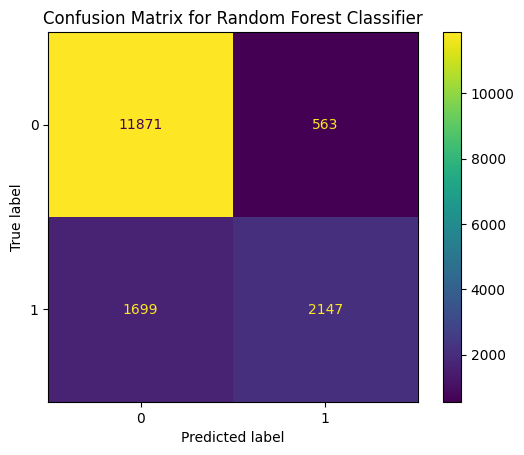

In [20]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred1)).plot()
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

---
Insights from the above confusion matrix:

- The model is good when classifying negatives but slightly poor for positives.
- Such precision and recall is due to skewness in dataset.
---

### Getting the ***classification report*** for random forest classifier

In [21]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12434
           1       0.79      0.56      0.65      3846

    accuracy                           0.86     16280
   macro avg       0.83      0.76      0.78     16280
weighted avg       0.86      0.86      0.85     16280



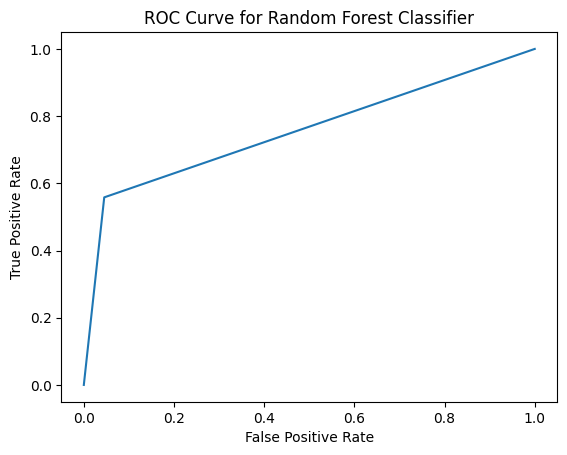

ROC-AUC score: 0.7564816280925324


In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)                               ## fpr = False Positive Rate, tpr = True Positive Rate
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.show()
roc1 = roc_auc_score(y_test, y_pred1)
print(f"ROC-AUC score: {roc1}")

---
## XGBoost Classifier
---

IMPORTING XGBOOST CLASSIFIER

In [23]:
from xgboost import XGBClassifier

### Defining XGBoost Classifier with hyperparameters

In [24]:
model2 = XGBClassifier(n_estimators=150, max_depth=5, learning_rate=0.09, gamma = 0)## learning_rate = the constant multiplied to output of each tree, before total prediction
model2.fit(X_train_scaled, y_train)                                                 ## gamma = value at which the leave/stump is pruned if lower value
y_proba2 = model2.predict_proba(X_test_scaled)[:, 1]
y_pred2 = (y_proba2 > 0.5).astype(int)

Calculating ***accuracy score*** for XGBoost Classifier

In [25]:
acc2 = accuracy_score(y_test, y_pred2)
acc2

0.8752457002457003

### Plotting a Confusion Matrix to get idea of TP, TN, FP, FN for XGBoost Classifier

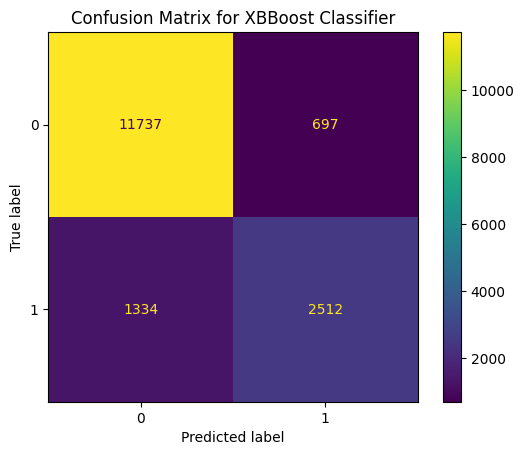

In [26]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred2)).plot()
plt.title('Confusion Matrix for XBBoost Classifier')
plt.show()

---
Insights of confusion matrix above:

- Similar to Random Forest Classifier the recall is lower but this time the precision is much higher.
---

### Getting the ***classification report*** for xgboost classifier

In [27]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     12434
           1       0.78      0.65      0.71      3846

    accuracy                           0.88     16280
   macro avg       0.84      0.80      0.82     16280
weighted avg       0.87      0.88      0.87     16280



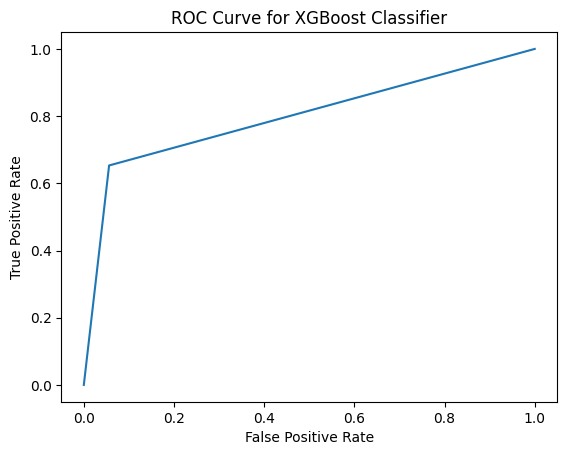

ROC-AUC score: 0.7985450751470625


In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)                               ## fpr = False Positive Rate, tpr = True Positive Rate
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.show()
roc2 = roc_auc_score(y_test, y_pred2)
print(f"ROC-AUC score: {roc2}")

## Light GBM Classifier

In [29]:
from lightgbm import LGBMClassifier

### Defining Light GBM Classifier with hyperparameters

In [30]:
model3 = LGBMClassifier(n_estimators=150, max_depth=5, learning_rate=0.09, verbosity=-1)

model3.fit(X_train_scaled, y_train)
y_proba3 = model3.predict_proba(X_test_scaled)[:, 1]
y_pred3 = (y_proba3 > 0.5).astype(int)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Calculating ***accuracy score*** for Light GBM Classifier

In [31]:
acc3 = accuracy_score(y_test, y_pred3)
acc3

0.8762285012285013

### Plotting a Confusion Matrix to get idea of TP, TN, FP, FN for Light GBM Classifier

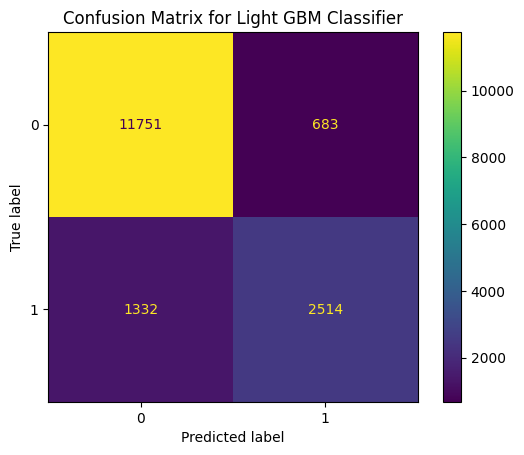

In [32]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred3)).plot()
plt.title('Confusion Matrix for Light GBM Classifier')
plt.show()

---
Insights on confusion matrix above:

- The results are almost similar to XGBoost Classifier model trained above.
- Only recall is inches better and precision is inches worse than of XGBoost Classifier, which nullifies the overall change.
- Exact similarity of accuray score also suggest the same.
---

### Getting the ***classification report*** for light gbm classifier

In [33]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     12434
           1       0.79      0.65      0.71      3846

    accuracy                           0.88     16280
   macro avg       0.84      0.80      0.82     16280
weighted avg       0.87      0.88      0.87     16280



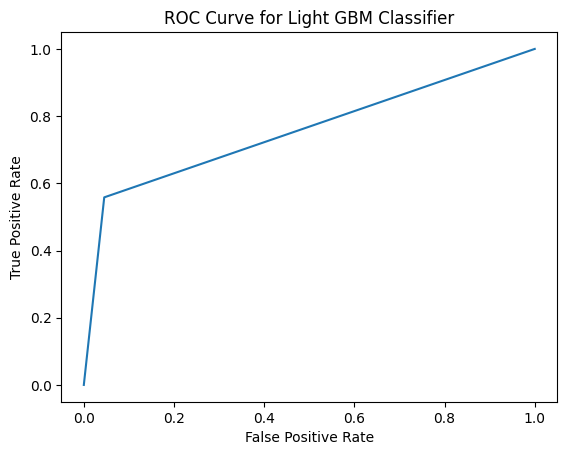

ROC-AUC score: 0.799368058042251


In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)                               ## fpr = False Positive Rate, tpr = True Positive Rate
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Light GBM Classifier')
plt.show()
roc3 = roc_auc_score(y_test, y_pred3)
print(f"ROC-AUC score: {roc3}")

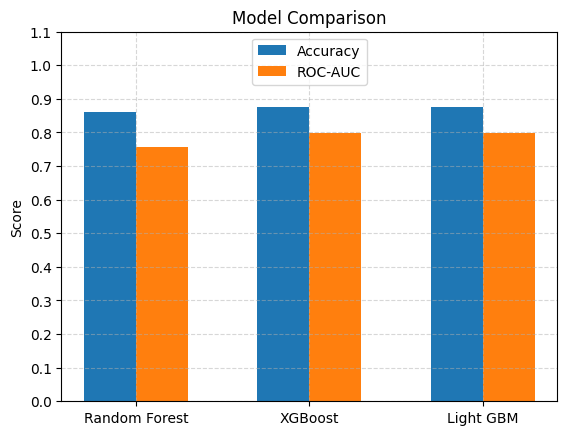

In [35]:
Accuracy = [acc1, acc2, acc3]
ROC_AUC = [roc1, roc2, roc3]

models = ["Random Forest", "XGBoost", "Light GBM"]

width = 0.30
x = np.arange(3)

plt.bar(x - width/2, Accuracy, width=width, label='Accuracy')
plt.bar(x + width/2, ROC_AUC, width=width, label='ROC-AUC')

plt.xticks(x, models)
plt.ylabel('Score')
plt.title('Model Comparison')
plt.yticks(np.arange(0, 1.2, 0.1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper center')
plt.show()

- From the Model Comparison - bar plot, we observe that the ROC-AUC scores for LGBM and XGBoost are identical, while Random Forest has a slightly lower ROC-AUC score.
- In terms of accuracy, LGBM performs slightly better than both XGBoost and Random Forest.

In [36]:
best_model = model3                        ## model2 is Light GBM Classifier

best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"ROC-AUC score: {roc_auc_score(y_test, y_pred)}")
print("Classification Report")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy score: 0.8762285012285013
ROC-AUC score: 0.799368058042251
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     12434
           1       0.79      0.65      0.71      3846

    accuracy                           0.88     16280
   macro avg       0.84      0.80      0.82     16280
weighted avg       0.87      0.88      0.87     16280



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
